In [49]:
from pennylane import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from QCUnet import *
from unitary import U_TTN, U_5


In [61]:

PATH_D_TRAIN=os.getcwd() + "/data/DataTrain/input_tiles/"
PATH_S_TRAIN=os.getcwd()+"/data/DataTrain/output_matrix/"
PATH_D_TEST=os.getcwd()+"/data/DataTest/input_tiles/"
PATH_S_TEST=os.getcwd()+"/data/DataTest/output_matrix/"

## Plot Unitary 

12
Circuit visualization has been saved


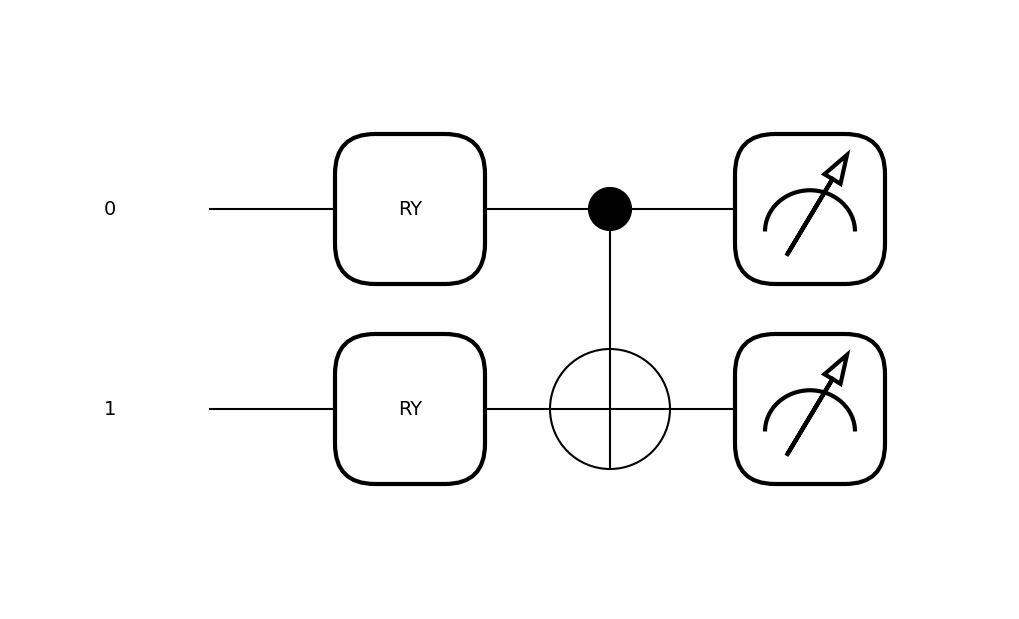

In [52]:
def draw_unitary(circuit, params, path ):
    # Draw the circuit
    fig, ax = qml.draw_mpl(circuit)(params)

    # Adjust the figure size if needed
    fig.set_size_inches(10, 6)

    # Save the figure
    plt.savefig(path, dpi=300, bbox_inches='tight')

    print("Circuit visualization has been saved")


    # If you want to display the circuit directly, uncomment the following line:
    plt.show()

# Create a quantum device
dev = qml.device('default.qubit', wires=2)
unitary = U_TTN

# Create a QNode
@qml.qnode(dev)
def circuit(params):
    unitary(params, wires=[0, 1])
    return qml.state()

# Set some example parameters
params = [np.pi/4, np.pi/3]
params = initialize_params(unitary)

draw_unitary(circuit, params, path= 'circuit_visualizations/U_TTN.png')

## Plot QC-Inc

(1,)
(1,)
torch.Size([13, 90, 90])
Circuit visualization has been saved


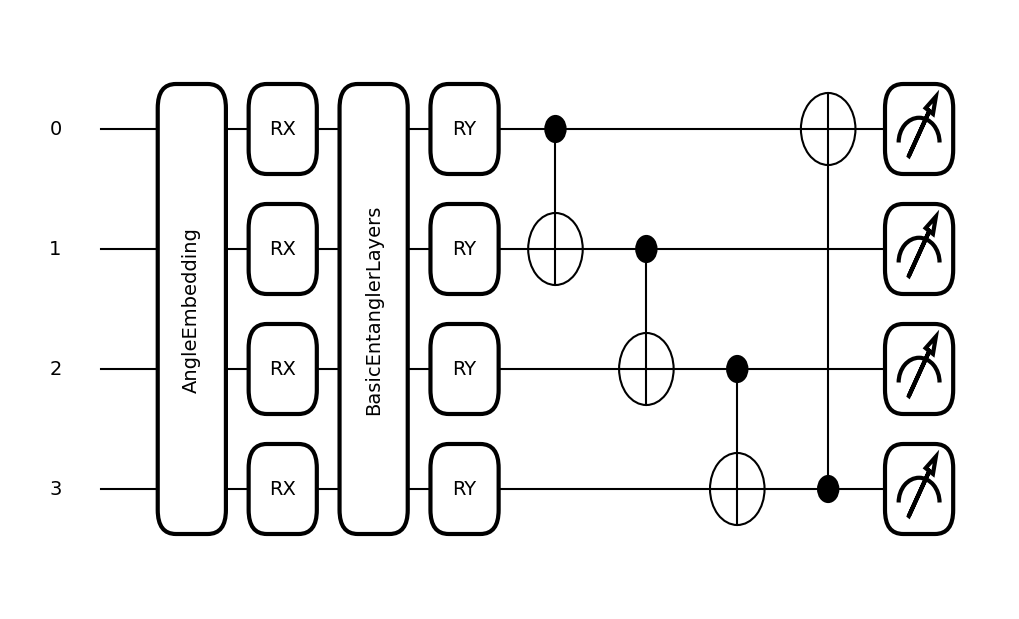

In [32]:
from subdataset import  dataset_images_train
from unitary import unitaries_params_dict


unitary = None

## QCNN circuit  
@qml.qnode(dev)
def QCNNcircuit(inputs, weights, n_qubits, unitary =None ):
    qml.AngleEmbedding(inputs, wires=range(n_qubits)).expand()
    if unitary is None: 
        qml.BasicEntanglerLayers(weights, wires=range(n_qubits), rotation= RY).expand()
    else: 
        unitary(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]




 
def draw_QCNN_layer(circuit, window_pixels, weights, n_qubits , unitary, path ):
    # Draw the circuit
    fig, ax = qml.draw_mpl(circuit)(window_pixels, weights, n_qubits , unitary)

    # Adjust the figure size if needed
    fig.set_size_inches(10, 6)

    # Save the figure
    plt.savefig(path, dpi=300, bbox_inches='tight')

    print("Circuit visualization has been saved")


    # If you want to display the circuit directly, uncomment the following line:
    plt.show()



PATH_D_TRAIN=os.getcwd() + "/data/DataTrain/input_tiles/"
PATH_S_TRAIN=os.getcwd()+"/data/DataTrain/output_matrix/"
PATH_D_TEST=os.getcwd()+"/data/DataTest/input_tiles/"
PATH_S_TEST=os.getcwd()+"/data/DataTest/output_matrix/"
bands = [1,2,3,4,5,6,7,8,9,10,11,12,13]
data_train = create_dataset(
        datadir=PATH_D_TRAIN,
        segdir=PATH_S_TRAIN,
        band=bands,
	apply_transforms=True, imgfiles = dataset_images_train[:1] )


if unitary in [U_TTN, U_5]: 
    params = initialize_params(unitary)
    # weights = nn.Parameter(torch.from_numpy(params))
    weights = nn.Parameter(
            torch.from_numpy(params))
else: 
    weights = nn.Parameter(
            torch.from_numpy(np.random.uniform(
                0, np.pi, (1, 4))))
l_image = data_train.__getitem__(0)['img'].unsqueeze(0)
window_size= 2
window_pixels = [l_image[0, 0, 0 + m, 0 + n] * np.pi for m in range(window_size) for n in range(window_size)]
# q_results = circuit()
# weights = weights[0:U_params]
draw_QCNN_layer(QCNNcircuit, window_pixels, weights, n_qubits = 4, unitary= unitary, path= './circuit_visualizations/QCNN_inc.png' )



## Plot Q-Down 

(1,)
(1,)
torch.Size([13, 90, 90])
Circuit visualization has been saved


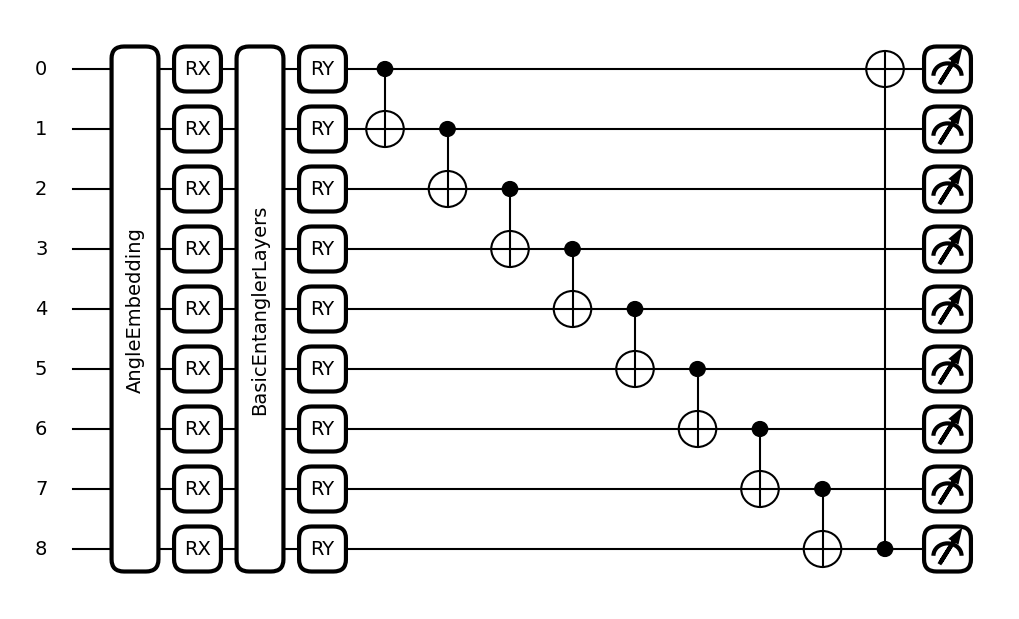

In [34]:
from subdataset import  dataset_images_train
from unitary import unitaries_params_dict


unitary = None

## QCNN circuit  
@qml.qnode(dev)
def QCNNcircuit(inputs, weights, n_qubits, unitary =None ):
    qml.AngleEmbedding(inputs, wires=range(n_qubits)).expand()
    if unitary is None: 
        qml.BasicEntanglerLayers(weights, wires=range(n_qubits), rotation= RY).expand()
    else: 
        unitary(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]


def draw_QCNN_layer(circuit, window_pixels, weights, n_qubits , unitary, path ):
    # Draw the circuit
    fig, ax = qml.draw_mpl(circuit)(window_pixels, weights, n_qubits , unitary)

    # Adjust the figure size if needed
    fig.set_size_inches(10, 6)

    # Save the figure
    plt.savefig(path, dpi=300, bbox_inches='tight')

    print("Circuit visualization has been saved")


    # If you want to display the circuit directly, uncomment the following line:
    plt.show()



bands = [1,2,3,4,5,6,7,8,9,10,11,12,13]
data_train = create_dataset(
        datadir=PATH_D_TRAIN,
        segdir=PATH_S_TRAIN,
        band=bands,
	apply_transforms=True, imgfiles = dataset_images_train[:1] )


if unitary in [U_TTN, U_5]: 
    params = initialize_params(unitary)
    # weights = nn.Parameter(torch.from_numpy(params))
    weights = nn.Parameter(
            torch.from_numpy(params))
else: 
    weights = nn.Parameter(
            torch.from_numpy(np.random.uniform(
                0, np.pi, (1, 9))))
l_image = data_train.__getitem__(0)['img'].unsqueeze(0)
window_size= 3
window_pixels = [l_image[0, 0, 0 + m, 0 + n] * np.pi for m in range(window_size) for n in range(window_size)]
# q_results = circuit()
# weights = weights[0:U_params]
draw_QCNN_layer(QCNNcircuit, window_pixels, weights, n_qubits = 9, unitary= unitary, path= './circuit_visualizations/QCNN_down.png' )



## Draw the summary

In [1]:
from QCUnet import *
from QCUBottleNeck import *

# fixed 
image_size = 90
bs = 10
ep = 1


# varying []
bands = [1,2,3,4,5,6,7,8,9,10,11,12,13]

n_channels = len(bands)
lr = 0.001 

# the configs to test: 

Unitaries = [None, U_TTN, U_5, U_6, U_9, U_13, U_14, U_15, U_SO4, U_SU4]

unitary = Unitaries[0]

quantum_layers= [True, False, True]
if quantum_layers == [False, False, True]:
    model = UNetWithQBottleNeck(n_channels=n_channels, n_classes=1, unitary=unitary)
else:
    model = QCUNet(n_channels=n_channels, quantum_layers= quantum_layers ,n_classes=1, 
                   unitary=unitary)

summary(model, (13, 90, 90))
